#Handwritten Character Recognition

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


👉Load Data

In [2]:
train_dir = pd.read_csv(r"C:\Users\aditi\Downloads\HandwrittenCharacterRecognition-main\HandwrittenCharacterRecognition-main\emnist-balanced-train.csv")
test_dir = pd.read_csv(r"C:\Users\aditi\Downloads\HandwrittenCharacterRecognition-main\HandwrittenCharacterRecognition-main\emnist-balanced-test.csv")

In [3]:
train_dir.shape, test_dir.shape

((112799, 785), (18799, 785))

👉Data Cleaning (Remove 'nan' values)

In [4]:
print(train_dir.isna().sum())
print(test_dir.isna().sum())

45       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.529    0
0.530    0
0.531    0
0.532    0
0.533    0
Length: 785, dtype: int64
41       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.528    0
0.529    0
0.530    0
0.531    0
0.532    0
Length: 785, dtype: int64


In [5]:
# # because the last data topic have several 'nan' values
# train_dir = train_dir.iloc[:-1, :]
# test_dir = test_dir.iloc[:-1, :]

In [6]:
print(train_dir.isna().sum())
print(test_dir.isna().sum())

45       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.529    0
0.530    0
0.531    0
0.532    0
0.533    0
Length: 785, dtype: int64
41       0
0        0
0.1      0
0.2      0
0.3      0
        ..
0.528    0
0.529    0
0.530    0
0.531    0
0.532    0
Length: 785, dtype: int64


👉Map for the labels

labels are mapped to ascii values of the character in the image.

In [7]:
map = {0 : 48,
1 : 49,
2 : 50,
3 : 51,
4 : 52,
5 : 53,
6 : 54,
7 : 55,
8 : 56,
9 : 57,
10 : 65,
11 : 66,
12 : 67,
13 : 68,
14 : 69,
15 : 70,
16 : 71,
17 : 72,
18 : 73,
19 : 74,
20 : 75,
21 : 76,
22 : 77,
23 : 78,
24 : 79,
25 : 80,
26 : 81,
27 : 82,
28 : 83,
29 : 84,
30 : 85,
31 : 86,
32 : 87,
33 : 88,
34 : 89,
35 : 90,
36 : 97,
37 : 98,
38 : 100,
39 : 101,
40 : 102,
41 : 103,
42 : 104,
43 : 110,
44 : 113,
45 : 114,
46 : 116}

In [8]:
num_train_images = train_dir.shape[0]
num_test_images = test_dir.shape[0]

num_train_images, num_test_images

(112799, 18799)

👉Visualizing the data

Text(0.5, 1.0, 'Z')

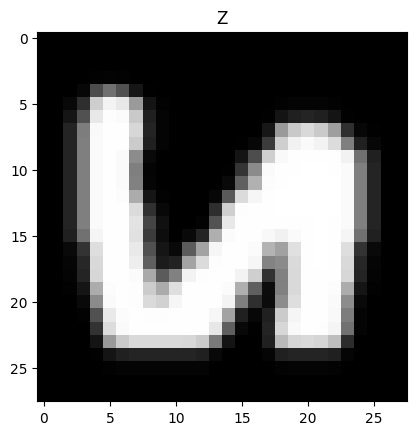

In [9]:
import random
t = random.randint(0, num_train_images-1)
plt.imshow(np.asarray(train_dir.iloc[t, 1:]).reshape([28,28]), cmap='gray')
plt.title(chr(map[train_dir.iloc[t, 0]]))

👉Seperate Data and Label for train and test data

In [10]:
X_train = np.asarray(train_dir.iloc[:, 1:])
Y_train = np.asarray(train_dir.iloc[:, 0])

X_test = np.asarray(train_dir.iloc[:, 1:])
Y_test = np.asarray(train_dir.iloc[:, 0])

👉Normalise

In [11]:
X_train = X_train/255.0
X_test = X_test/255.0

👉Reshaping the images

In [12]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

👉One-hot encoding of labels

In [13]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train, num_classes = 47)
Y_test = to_categorical(Y_test, num_classes = 47)

Y_train = Y_train.astype(int)
Y_test = Y_test.astype(int)

In [14]:
Y_train.shape, Y_test.shape

((112799, 47), (112799, 47))

In [15]:
X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((112799, 28, 28, 1), (112799, 47), (112799, 28, 28, 1), (112799, 47))

In [16]:
X_train.dtype, Y_train.dtype, X_test.dtype, Y_test.dtype

(dtype('float64'), dtype('int32'), dtype('float64'), dtype('int32'))

Text(0.5, 1.0, 'r')

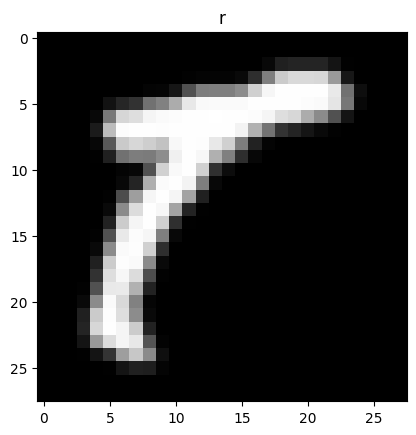

In [17]:
import random
t = random.randint(0, num_train_images-1)
plt.imshow(X_train[t], cmap='gray')
plt.title(chr(map[np.argmax(Y_train[t])]))

👉 Making the orientation of image correct

Flipping it horizontally and then rotate it 90 degrees anticlockwise

In [18]:
def flip_and_rotate_90anticlockwise(image):
    # Horizontal flip
    flipped_image = np.fliplr(image)
    # Rotate 90 degrees anticlockwise
    rotated_image = np.rot90(flipped_image.reshape(28, 28), k=1).reshape(28, 28, 1)
    return rotated_image

In [19]:
X_train = np.asarray([flip_and_rotate_90anticlockwise(image) for image in X_train])
X_test = np.asarray([flip_and_rotate_90anticlockwise(image) for image in X_test])

Text(0.5, 1.0, 'U')

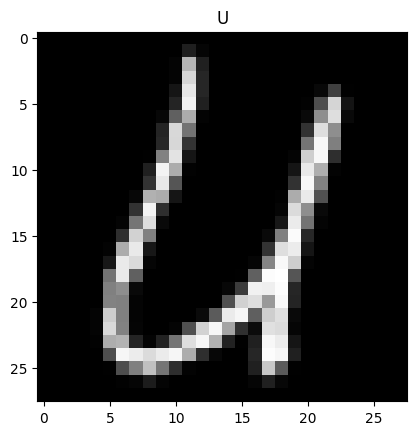

In [20]:
import random
t = random.randint(0, num_train_images-1)
plt.imshow(X_train[t], cmap='gray')
plt.title(chr(map[np.argmax(Y_train[t])]))

👉Define Model

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [22]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(47, activation='softmax')
])

c:\Users\aditi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

👉Training the Model

In [25]:
import math

# Calculate steps per epoch
steps_per_epoch = math.ceil(len(X_train) / 32)

# Fit the model
history = model.fit(X_train, Y_train, batch_size=32, steps_per_epoch=steps_per_epoch, epochs=30, validation_data=(X_test, Y_test))

# Save the model
model.save(r"C:\Users\aditi\Downloads\HandwrittenCharacterRecognition-main\HandwrittenCharacterRecognition-main\Handwritten_Character_Recognition_model.h5")


Epoch 1/30
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 55s 15ms/step - accuracy: 0.6632 - loss: 1.1576 - val_accuracy: 0.8398 - val_loss: 0.4628
Epoch 2/30
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 100s 28ms/step - accuracy: 0.8500 - loss: 0.4371 - val_accuracy: 0.8693 - val_loss: 0.3671
Epoch 3/30
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 83s 23ms/step - accuracy: 0.8683 - loss: 0.3647 - val_accuracy: 0.8830 - val_loss: 0.3240
Epoch 4/30
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 130s 37ms/step - accuracy: 0.8837 - loss: 0.3221 - val_accuracy: 0.8953 - val_loss: 0.2853
Epoch 5/30
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 127s 36ms/step - accuracy: 0.8906 - loss: 0.2930 - val_accuracy: 0.9036 - val_loss: 0.2582
Epoch 6/30
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 105s 30ms/step - accuracy: 0.8979 - loss: 0.2707 - val_accuracy: 0.9083 - val_loss: 0.2437
Epoch 7/30
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 112s 32ms/step - accuracy: 0.9045 - loss: 0.2510 - val_accuracy: 0.9024 - val_loss: 0.2371
Epoch 8/30
3525/3525 ━━━━━━━━━━━━━━━━━━━━ 109s 31ms/step - accuracy: 0.

👉Test Accuracy

In [26]:
test_loss, test_acc = model.evaluate(X_test, Y_test, verbose=2)
print('\nTest accuracy:', test_acc)

3525/3525 - 25s - 7ms/step - accuracy: 0.9641 - loss: 0.0873

Test accuracy: 0.9641308784484863


👉Visualizing performance

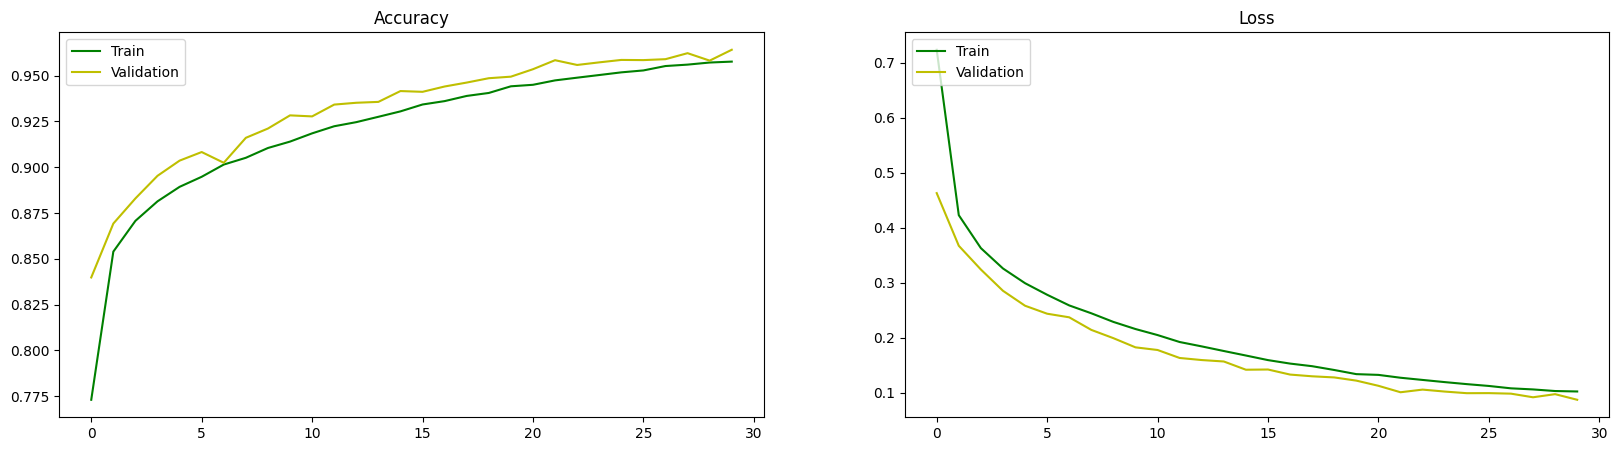

In [27]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))

ax1.plot(history.history['accuracy'], color='g', )
ax1.plot(history.history['val_accuracy'], color='y')
ax1.set_title('Accuracy')
ax1.legend(['Train', 'Validation'], loc='upper left')

ax2.plot(history.history['loss'], color='g', )
ax2.plot(history.history['val_loss'], color='y')
ax2.set_title('Loss')
ax2.legend(['Train', 'Validation'], loc='upper left')

👉Predicting on Given data

In [28]:
import random
t = random.randint(0, num_test_images-1)
img = X_test[t]
label = np.argmax(Y_test[t])

In [29]:
label

30

Text(0.5, 1.0, 'U')

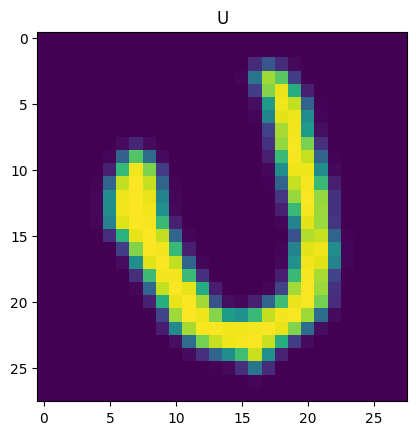

In [30]:
plt.imshow(img)
plt.title(chr(map[label]))

In [31]:
img.shape

(28, 28, 1)

In [32]:
pred = model.predict(img.reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step


In [33]:
chr(map[np.argmax(pred)])

'U'

👉Predicting on new data

In [34]:
from PIL import Image

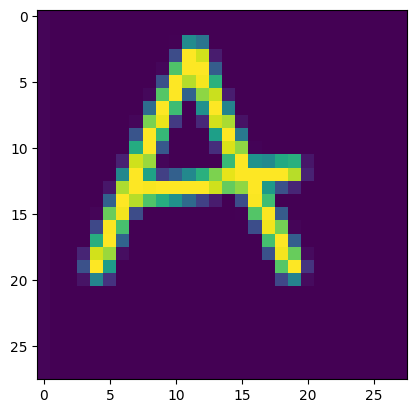

In [36]:
image = r"C:\Users\aditi\Downloads\HandwrittenCharacterRecognition-main\HandwrittenCharacterRecognition-main\i1.png"
image = Image.open(image)
image = image.resize((28, 28))
image = image.convert('L')

image = np.asarray(image)
image = image.reshape(28, 28, 1)
image = image.astype('float64')
image = image/255.0

plt.imshow(image)

In [37]:
pred = model.predict(image.reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [38]:
chr(map[np.argmax(pred)])

'A'

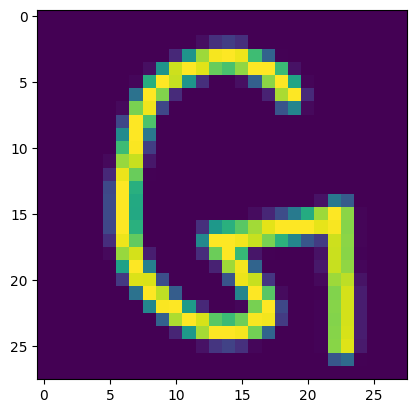

In [40]:
image = r"C:\Users\aditi\Downloads\HandwrittenCharacterRecognition-main\HandwrittenCharacterRecognition-main\i2.png"
image = Image.open(image)
image = image.resize((28, 28))
image = image.convert('L')

image = np.asarray(image)
image = image.reshape(28, 28, 1)
image = image.astype('float64')
image = image/255.0

plt.imshow(image)

In [41]:
pred = model.predict(image.reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


In [42]:
chr(map[np.argmax(pred)])

'G'

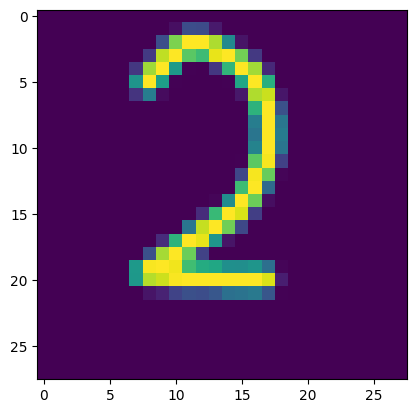

In [44]:
image = r"C:\Users\aditi\Downloads\HandwrittenCharacterRecognition-main\HandwrittenCharacterRecognition-main\i3.png"
image = Image.open(image)
image = image.resize((28, 28))
image = image.convert('L')

image = np.asarray(image)
image = image.reshape(28, 28, 1)
image = image.astype('float64')
image = image/255.0

plt.imshow(image)

In [45]:
pred = model.predict(image.reshape(1, 28, 28, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


In [46]:
chr(map[np.argmax(pred)])

'2'